In [1]:
import warnings
warnings.filterwarnings('ignore')

import platform; print(platform.platform())
import sys; print("Python ", sys.version)
import requests; print("requests ", requests.__version__)
import json; print("json ", json.__version__)
import pandas as pd; print("pandas ", pd.__version__)
import seaborn as sns; print("seaborn ", sns.__version__)
import numpy as np; print("numpy ", np.__version__)
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import plotly.graph_objects as go
from datetime import date, timedelta
from collections import Counter

today = date.today()
thirtydaysago=  today-timedelta(30)
print("Today is", today)

r_daily_states = requests.get('https://covidtracking.com/api/states/daily')
a_daily_states = json.loads(r_daily_states.text)
res_daily_states = json_normalize(a_daily_states)
df_daily_states = pd.DataFrame(res_daily_states)
df_daily_states['date'] =  pd.to_datetime(df_daily_states['date'], format='%Y%m%d')

# r_states = requests.get('https://covidtracking.com/api/states')
# a_states = json.loads(r_states.text)
# res_states = json_normalize(a_states)
# df_states = pd.DataFrame(res_states)

Windows-10-10.0.17763-SP0
Python  3.6.8 |Anaconda custom (64-bit)| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]
requests  2.21.0
json  2.0.9
pandas  0.24.2
seaborn  0.9.0
numpy  1.16.2
Today is 2020-05-25


In [2]:
df_daily_states_30 = df_daily_states[(df_daily_states['date'] >= thirtydaysago)]

<function matplotlib.pyplot.show(*args, **kw)>

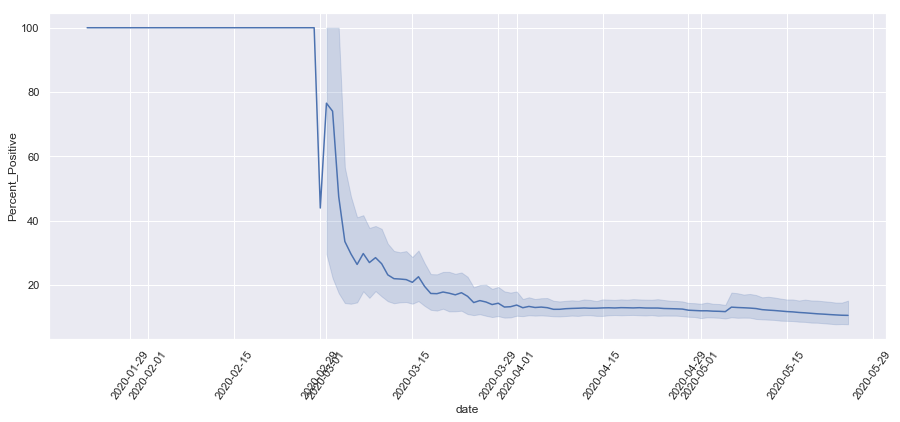

In [3]:
sns.set(rc={'figure.figsize':(15,6)})
df_daily_states['Percent_Positive'] = 100*df_daily_states['positive']/df_daily_states['totalTestResults']
sns.lineplot(data=df_daily_states, x='date', y='Percent_Positive')
plt.xticks(rotation=55)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

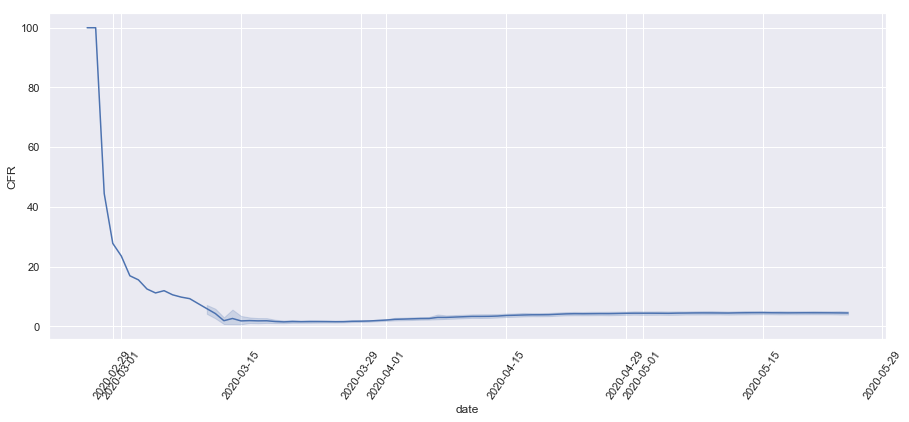

In [4]:
df_daily_states['CFR'] = 100*df_daily_states['death']/df_daily_states['positive']
sns.lineplot(data=df_daily_states, x='date', y='CFR')
plt.xticks(rotation=55)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

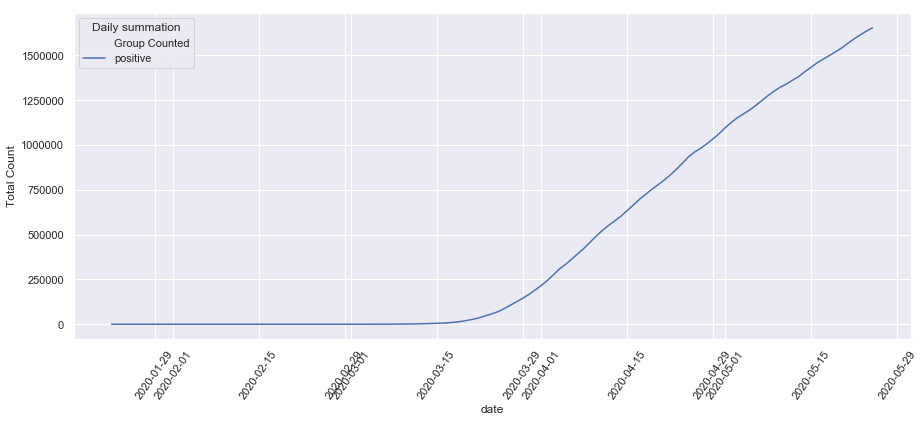

In [5]:
df_2 = df_daily_states.groupby('date')['positive'].sum().reset_index()
sns.lineplot(x='date', y="Total Count", hue="Group Counted", 
             data=pd.melt(df_2, ['date'], value_name="Total Count", var_name="Group Counted"))
plt.xticks(rotation=55)
plt.legend(loc=2, title="Daily summation")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

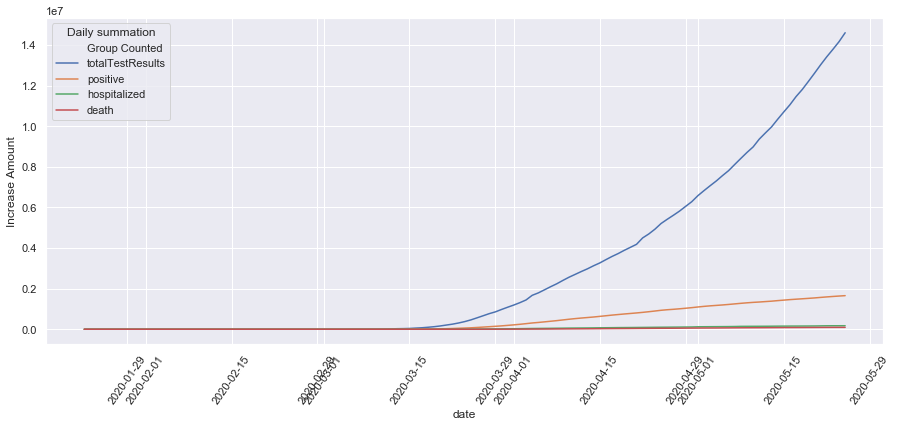

In [6]:
df_2 = df_daily_states.groupby('date')['totalTestResults', 'positive', 'hospitalized', 'death'].sum().reset_index()
sns.lineplot(x='date', y="Increase Amount", hue="Group Counted", 
             data=pd.melt(df_2, ['date'], value_name="Increase Amount", var_name="Group Counted"))
plt.xticks(rotation=55)
plt.legend(loc=2, title="Daily summation")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

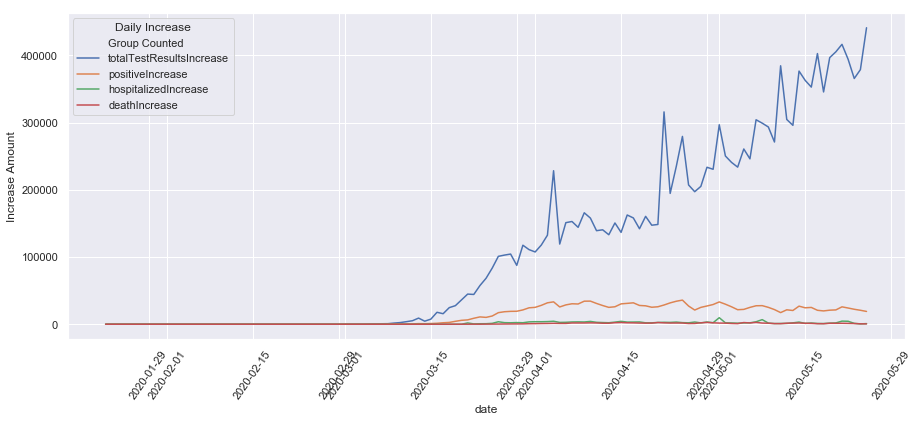

In [7]:
df_2 = df_daily_states.groupby('date')['totalTestResultsIncrease', 'positiveIncrease', 'hospitalizedIncrease', 'deathIncrease'].sum().reset_index()
sns.lineplot(x='date', y="Increase Amount", hue="Group Counted", 
             data=pd.melt(df_2, ['date'], value_name="Increase Amount", var_name="Group Counted"))
plt.xticks(rotation=55)
plt.legend(loc=2, title="Daily Increase")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

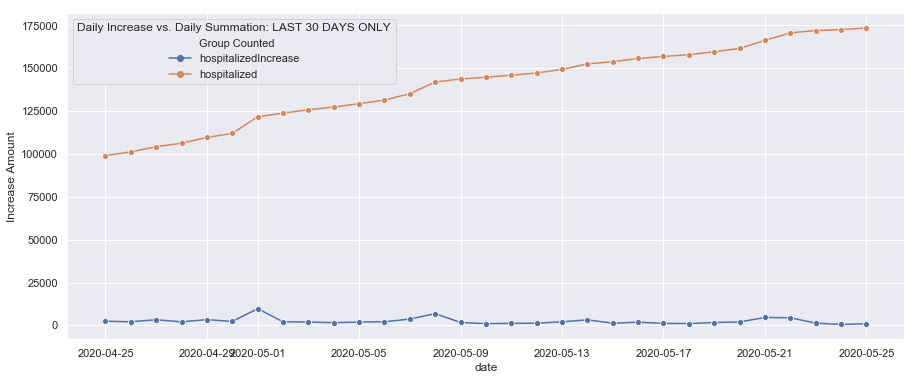

In [8]:
df_2 = df_daily_states_30.groupby('date')['hospitalizedIncrease', 'hospitalized'].sum().reset_index()
sns.lineplot(x='date', y="Increase Amount", hue="Group Counted", style="Group Counted", markers=["o", "o"], dashes=False, 
             data=pd.melt(df_2, ['date'], value_name="Increase Amount", var_name="Group Counted"))
plt.legend(loc=2, title="Daily Increase vs. Daily Summation: LAST 30 DAYS ONLY")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

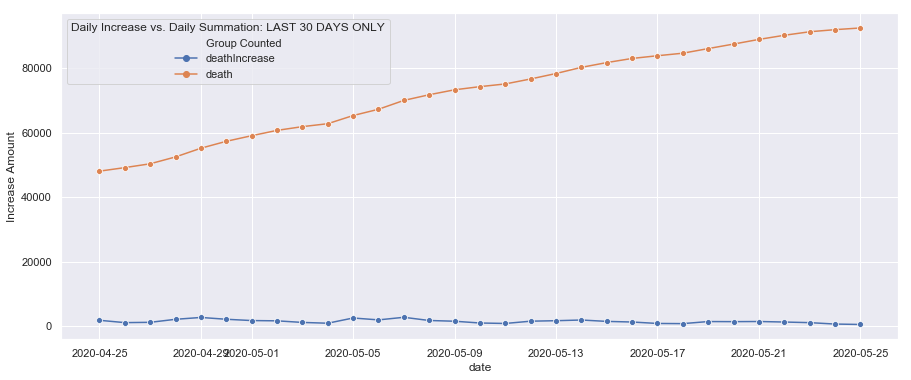

In [9]:
df_2 = df_daily_states_30.groupby('date')['deathIncrease', 'death'].sum().reset_index()
sns.lineplot(x='date', y="Increase Amount", hue="Group Counted", style="Group Counted", markers=["o", "o"], dashes=False, 
             data=pd.melt(df_2, ['date'], value_name="Increase Amount", var_name="Group Counted"))
plt.legend(loc=2, title="Daily Increase vs. Daily Summation: LAST 30 DAYS ONLY")
plt.show